In [ ]:
import numpy as np # np gives us the sine fn and math methods
from scipy.optimize import curve_fit # method for optimizing params for best fit (recursion)
import pylab as plt # for plotting data - note need to install matplotlib package to resolve this impor

True A: 3, Fitted A: 2.988844209420449
True B: 1, Fitted B: 1.0019620121812762
True C: 0.1, Fitted C: 0.08907838329460568
True D: 0.5, Fitted D: 0.5080588871358842


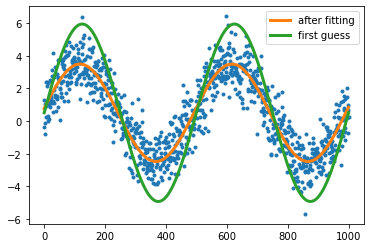

In [9]:
# y = A*sin(Bx+C)+D - figure out A,B,C,D such that we have best fitting sine fn to our data points

# make some fake data with noise
n = 1000 # number of data points
x = np.linspace(0, 4*np.pi, n) # create a time vector, t (ind var)
# true values
A = 3
B = 1
C = 0.1
D = 0.5
y = A*np.sin(B*x+C) + D + np.random.randn(n) # create fake dep var with noise - thanks to randn

# y = A*sin(Bx+C)+D
guess_freq = 1 # freq is the B param - this is arbitrary
guess_amplitude = np.std(y)**2 # amp is the A param, note how our first guess will be
guess_phase = 0 # phase is C param, arbitrary guess
guess_offset = np.mean(y) # offset is D param (the vertical translation of the graph)

# persist the initial guesses (seed) in a list for the curve_fit method
p0=[guess_freq,
    guess_amplitude,
    guess_phase,
    guess_offset]

# define the custom function we want to fit
def sin_fn(x, freq, amplitude, phase, offset):
    return np.log(x * freq + phase) * amplitude + offset

# now do the fit
fit = curve_fit(sin_fn, x, y, p0=p0)

fit_A = fit[0][1]
fit_B = fit[0][0]
fit_C = fit[0][2]
fit_D = fit[0][3]

# log the true vs fitted values
print("True A: {}, Fitted A: {}".format(A, fit_A))
print("True B: {}, Fitted B: {}".format(B, fit_B))
print("True C: {}, Fitted C: {}".format(C, fit_C))
print("True D: {}, Fitted D: {}".format(D, fit_D))

# we'll use this to plot our first estimate. This might already be good enough for you
y_first_guess = sin_fn(x, *p0)

# recreate the fitted curve using the optimized parameters
y_fit = sin_fn(x, *fit[0])

plt.plot(y, '.')
plt.plot(y_fit, label='after fitting', linewidth=3)
plt.plot(y_first_guess, label='first guess', linewidth=3)
plt.legend()
plt.show()

### Docs ex

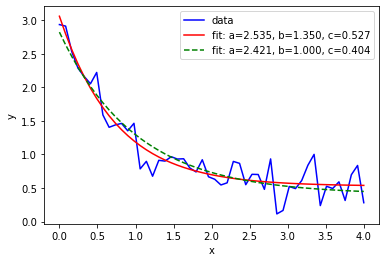

In [12]:
def func(x, a, b, c):
     return a * np.exp(-b * x) + c
#Define the data to be fit with some noise:

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

#Fit for the parameters a, b, c of the function `func`:

popt, pcov = curve_fit(func, xdata, ydata)
popt
#array([2.56274217, 1.37268521, 0.47427475])
plt.plot(xdata, func(xdata, *popt), 'r-',
...          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#Constrain the optimization to the region of ``0 <= a <= 3``,``0 <= b <= 1`` and ``0 <= c <= 0.5``:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
#array([2.43736712, 1.        , 0.34463856])
plt.plot(xdata, func(xdata, *popt), 'g--',
...          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()